In [19]:
import fastai
from fastai.vision.all import *
from fastdownload import FastDownload
import matplotlib.pyplot as plt

In [2]:
path = Path('./data')

In [3]:
Path.BASE_PATH = path

In [4]:
if not (path/'archive').exists():
    loader = FastDownload(base=path.name, module=fastai.data)
    loader.update('https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy')
    loader.download('https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy')

In [28]:
def get_quickdraw_tensors(path):
    files = get_files(path, extensions=['.npy'])
    
    label = 0
    for f in files:
        subject = torch.from_numpy(np.load(f))
        subject = subject.view(subject.shape[0], 1, 28, 28)
        labels = torch.tensor([label] * len(subject))
        
        if label == 0:
            x = subject
            y = labels
        else:
            x = torch.cat((x, subject))
            y = torch.cat((y, labels))
        
        label += 1
    
    return x, y

In [29]:
camels, labels = get_quickdraw_tensors(path)

In [30]:
camels.shape

torch.Size([121399, 1, 28, 28])

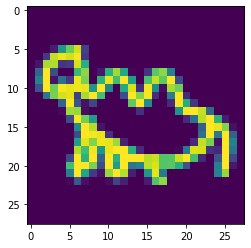

In [26]:
plt.imshow(camels[0].permute(1, 2, 0))

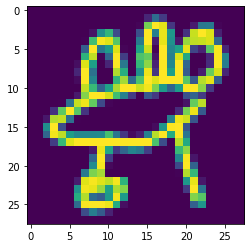

In [27]:
plt.imshow(camels[10].permute(1, 2, 0))

In [ ]:
#TODO: Getting the data into dataloaders